In [1]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection

In [20]:
# データウェアハウス
df_aapl = pandas_datareader.data.DataReader('AAPL', 'yahoo', '2018-07-27')
df_fb = pandas_datareader.data.DataReader('FB', 'yahoo', '2018-07-27')
df_gold = pandas_datareader.data.DataReader('GLD', 'yahoo', '2018-07-27')

In [21]:
df_aapl.tail(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-19,144.070007,141.669998,143.750000,142.449997,121434600.0,142.449997
2021-07-20,147.100006,142.960007,143.460007,146.149994,96350000.0,146.149994
2021-07-21,146.130005,144.630005,145.529999,145.399994,74993500.0,145.399994
2021-07-22,148.199997,145.809998,145.940002,146.800003,77338200.0,146.800003
2021-07-23,148.720001,146.919998,147.550003,148.559998,71361600.0,148.559998
2021-07-26,149.830002,147.699997,148.270004,148.990005,72269700.0,148.990005
2021-07-27,149.199997,145.550003,149.119995,146.770004,104818578.0,146.770004


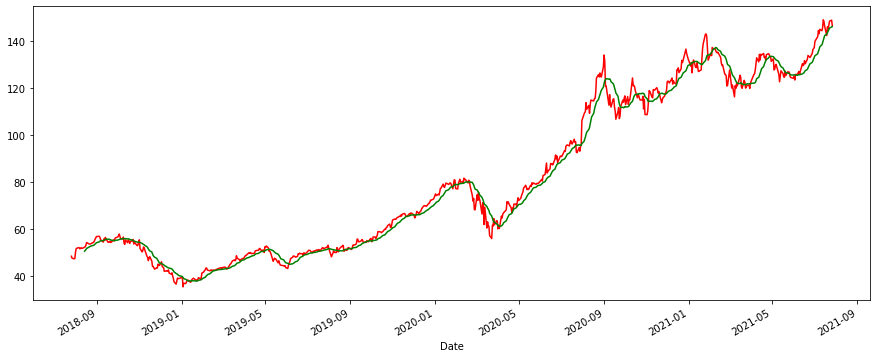

In [22]:
# 統計学 simple moving average
# df_aapl['SMA']は過去14日間の平均
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl['Close'].plot(figsize=(15,6), color="red")
df_aapl['SMA'].plot(figsize=(15,6), color="green")
plt.show()

In [27]:
# データマイニング
# 値上がり・値下がり率
df_aapl['Change'] = ((df_aapl['Close'] - df_aapl['Open']) / (df_aapl['Open']) * 100)
df_fb['Change'] = ((df_fb['Close'] - df_fb['Open'])  / (df_fb['Open']) * 100)
df_gold['Change'] = ((df_gold['Close'] - df_gold['Open']) / (df_gold['Open']) * 100)
df_aapl.tail(7).round(2)

,High,Low,Open,Close,Volume,Adj Close,SMA,Change
Date,,,,,,,,
2021-07-19,144.07,141.67,143.75,142.45,121434600.0,142.45,143.01,-0.90
2021-07-20,147.10,142.96,143.46,146.15,96350000.0,146.15,143.71,1.88
2021-07-21,146.13,144.63,145.53,145.40,74993500.0,145.40,144.31,-0.09
2021-07-22,148.20,145.81,145.94,146.80,77338200.0,146.80,144.99,0.59
2021-07-23,148.72,146.92,147.55,148.56,71361600.0,148.56,145.60,0.68
2021-07-26,149.83,147.70,148.27,148.99,72269700.0,148.99,146.10,0.49
2021-07-27,149.20,145.55,149.12,146.77,104818578.0,146.77,146.26,-1.58


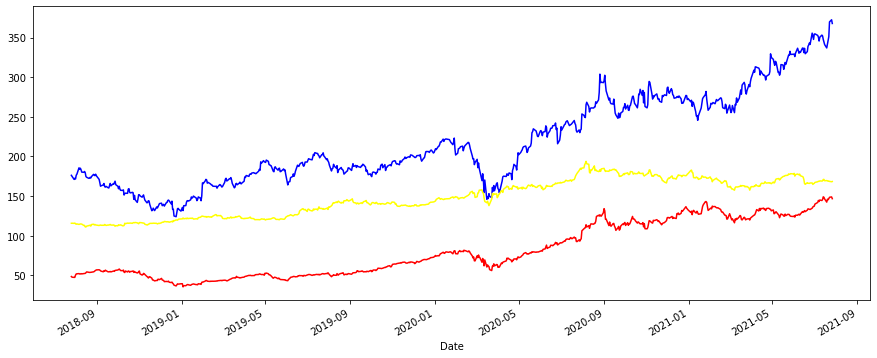

In [29]:
df_aapl['Close'].plot(figsize=(15,6), color="red")
df_fb['Close'].plot(figsize=(15,6), color="blue")
df_gold['Close'].plot(figsize=(15,6), color="yellow")
plt.show()

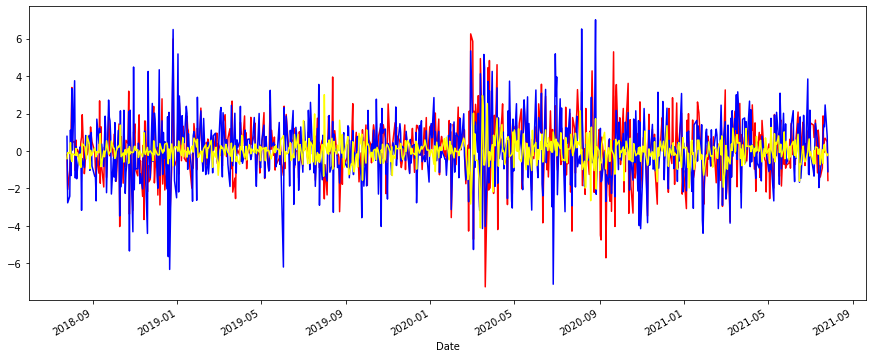

In [33]:
df_aapl['Change'].plot(figsize=(15,6), color="red")
df_fb['Change'].plot(figsize=(15,6), color="blue")
df_gold['Change'].plot(figsize=(15,6), color="yellow")
plt.show()

In [37]:
# 機械学習(マシンラーニング)
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(40)

,High,Low,Open,Close,Volume,Adj Close,SMA,Change,label
Date,,,,,,,,,
2021-06-01,125.349998,123.940002,125.080002,124.279999,67637100.0,124.279999,125.625713,-0.639593,149.149994
2021-06-02,125.239998,124.050003,124.279999,125.059998,59278900.0,125.059998,125.789285,0.627614,148.479996
2021-06-03,124.849998,123.129997,124.680000,123.540001,76229200.0,123.540001,125.687142,-0.914340,146.389999
2021-06-04,126.160004,123.849998,124.070000,125.889999,75169300.0,125.889999,125.575714,1.466914,142.449997
2021-06-07,126.320000,124.830002,126.169998,125.900002,71057600.0,125.900002,125.549285,-0.213994,146.149994
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998,125.684285,0.110584,145.399994
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,127.129997,125.858571,-0.062890,146.800003
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,126.110001,125.772857,-0.716420,148.559998
2021-06-11,127.440002,126.099998,126.529999,127.349998,53522400.0,127.349998,125.909999,0.648067,148.990005


In [42]:
# ラベルを削除したデータをXに代入
X = np.array(df_aapl.drop(['label', 'SMA'], axis=1))
# 株価の異常値を取り除きスケーリング
X = sklearn.preprocessing.scale(X)

# 予測にに使う過去30日間のデータ
predict_data = X[-30:]
# 過去30日を取り除いた入力データ
X = X[:-30]
y = np.array(df_aapl['label'])
# 過去30日間を取り除いた正解ラベル
y = y[:-30]

# 訓練データ８０％ 検証データ２０％
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# 訓練データを学習　
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

# 検証データを使い検証
accuracy = lr.score(X_test, y_test)
accuracy

/Users/satokota/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


0.9260806775056007

In [46]:
# 予測する
predicted_data = lr.predict(predict_data)
predicted_data

array([140.0251174 , 138.45335602, 141.04039904, 141.02437314,
       139.84524144, 142.2226642 , 143.28298785, 142.4103921 ,
       142.88123052, 143.93513453, 144.51160216, 145.83507907,
       145.23976648, 147.7417922 , 150.19006703, 151.47813675,
       149.99236912, 152.2327305 , 151.56390504, 153.06849086,
       156.19173324, 154.47620538, 153.33907311, 149.8445425 ,
       152.39302374, 152.93061712, 154.77634844, 155.11212771,
       155.93978621, 152.2043351 ])

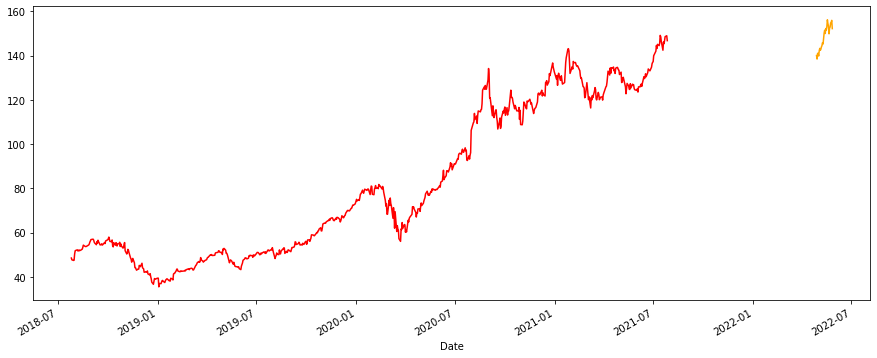

In [56]:
df_aapl['Predict'] = np.nan

last_date = df_aapl.iloc[-1].name

one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date] = np.append([np.nan]* (len(df_aapl.columns)-1), data)
    
df_aapl['Close'].plot(figsize=(15,6), color="red")
df_aapl['Predict'].plot(figsize=(15,6), color="orange")
plt.show()

In [57]:
# 人工知能(AI)
if df_aapl['Predict'][-1] > df_aapl['Close'][-31]:
    print('But using REST API')
else:
    print('Sell using REST API')

Sell using REST API
